#### Andrés Jimenez Mora - Moisés Salguero Morales

## Creación de una red neuronal desde cero
Se comienza con la importanción de todas las librerías necesarias para realizar nuestra red:

In [1]:
from numpy import argmax
import random
import math 
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Se define una clase para la capa de entrada con número de entradas, función de activación, taza de apredizaje y modo de aleatoriedad. En esta se tienen varios métodos: un método que inicializa, un método que actualiza la entradas de la capa y un método que calcula la salida.

In [2]:
#DEFINICION DE OBJETOS PARA LA RED NEURONAL
class capaEntrada:
    
    def __init__(self, numEntradas, functAct, tazaAprendizaje, aletoriedad):
        self.numEntradas=numEntradas
        self.vectorIn=[]
        self.functAct=functAct
        self.vectorSal=[]

    def actualizarEntradas(self,entradas):
        self.vectorIn=entradas
            
    def calcularSal(self):
        salida=0
        net=0
        self.vectorSal=[]
        
        #Calcula la salida de la función de activación según la escogencia del usuario
        
        if (self.functAct=="sigmoide"): 
            for k in range(self.numEntradas):
                net=self.vectorIn[k] 
                salida=1.0/(1.0 + np.exp(-net))
                self.vectorSal.append(salida) #se agregan las salidas al vector de salidas de la red
                
        elif (self.functAct=="tanh"):
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                salida=np.tanh(net)
                self.vectorSal.append(salida)
           
        elif (self.functAct=="relu"):
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                salida=1.0 - net**2
                self.vectorSal.append(salida)
        else:
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                self.vectorSal.append(net)
        
        return self.vectorSal #vector con las salidas de todas las neuronas
    

Ahora se crea una clase para definir una capa oculta, presenta métodos muy similares al objeto para la capa de entrada. En 
este caso se tiene un método que inicializa la capa Oculta, creando una matriz donde cada fila representa las entradas junto
con los pesos de la i-ésima neurona.

In [4]:
class capaOculta:
    
    def _init_(self, numEntradas, numNeur, functAct, tazaAprendizaje, aleatoriedad, tipo_capa):
        self.numNeur=numNeur
        self.numEntradas=numEntradas
        self.functAct=functAct
        self.vectorSal=[]
        self.vectorNet=[]
        self.capa=[]
        self.vectorPes=[]
        for i in range(self.numNeur):
            vectorCaracol=[]
            vectorCaracol=[random.uniform(-1,1) for _ in range(self.numEntradas+1)] #define una matriz de pesos aleatorios entre -1 y 1
            self.vectorPes.append(vectorCaracol)
        
        self.bias=1 #establece el bias en 1
        self.tipo_capa = tipo_capa #Para confirmar si es una capa oculta o una capa de salida
    
    def inicializarCapa(self):
        entradas=[1 for t in range(self.numEntradas)]
        entradas.append(self.bias) #agrega el bias
        
        #Crear una matriz cuyas filas son la información de cada neurona
        for j in range(self.numNeur):
            vector=[]
            vector.extend(entradas)
            vector.extend(self.vectorPes[j])
            self.capa.append(vector)
    
    
    def actualizarEntradas(self,vectorIn): #carga un vector con las salidas de la capa anterior
        vectorIn.append(self.bias)
        for i in range(self.numNeur):
            self.capa[i][:(self.numEntradas+1)]=vectorIn #guarda las entradas en la matriz de la capa
    
    def actualizarPesos(self,nuevaCapa):
        self.capa=nuevaCapa #carga los nuevos pesos
            
        
    def calcularNet(self):#calcula el net de cada neurona y lo guarda en un vector 2D
        self.vectorNet=[]
        for i in range(self.numNeur):
            pivote=0
            for l in range(self.numEntradas+1):
                pivote=self.capa[i][l]*self.capa[i][l+self.numEntradas+1]+ pivote
            self.vectorNet.append(pivote)

        
    def calcularSal(self): #calcula la salida según la función de activación escogida
        
        if (self.tipo_capa =="oculta"):#si se trata de capa oculta sí se usan las funciones de activación
            
            salida=0
            self.vectorSal=[]
            if (self.functAct=="sigmoide"): #sigmoide
                for k in range(self.numNeur):
                    net=self.vectorNet[k]
                    salida=1.0/(1.0 + np.exp(-net))
                    self.vectorSal.append(salida)

            elif (self.functAct=="tanh"): #tangente
                 for k in range(self.numNeur):
                    net=self.vectorNet[k]
                    salida=np.tanh(net)
                    self.vectorSal.append(salida)

            else:
                for k in range(self.numNeur): #relu
                    net=self.vectorNet[k]
                    salida=1.0 - net**2
                    self.vectorSal.append(salida)
            return self.vectorSal
        
        elif(self.tipo_capa == "salida"): #cuando se trata de una capa de salida, no se usan las funciones de activación
            self.vectorNet=[]
            for i in range(self.numNeur):
                pivote=0
                for l in range(self.numEntradas+1):
                    pivote=self.capa[i][l]*self.capa[i][l+self.numEntradas+1]+ pivote
                self.vectorSal.append(pivote)
            return self.vectorSal




Por último, se crea un objeto llamado red neuronal, con el objetivo de controlar los 2 objetos anteriores y establecer una
interfaz más sencilla con el usuario. Esta clase tiene los métodos asociados al foward y back propagation.

In [8]:
class redNeuronal:
    
    def _init_(self,functAct, learningRate, randomness,epoch): #carga los hiperparámetros digitos por el usuario
        self.functAct=functAct
        self.learningRate=learningRate
        self.randomness=randomness
        self.epoch=epoch


### Función de derivadas 

A continuación se puede observar la funcion que calcula la derivada de la función de activación respecto al net de cada neurona. En esta función evalúa la derivada de la función de activación seleccionada. De esta manera, definiendo las funciones de activación, en la siguiente imagen se muestran algunas definiciones de funciones de activacion.

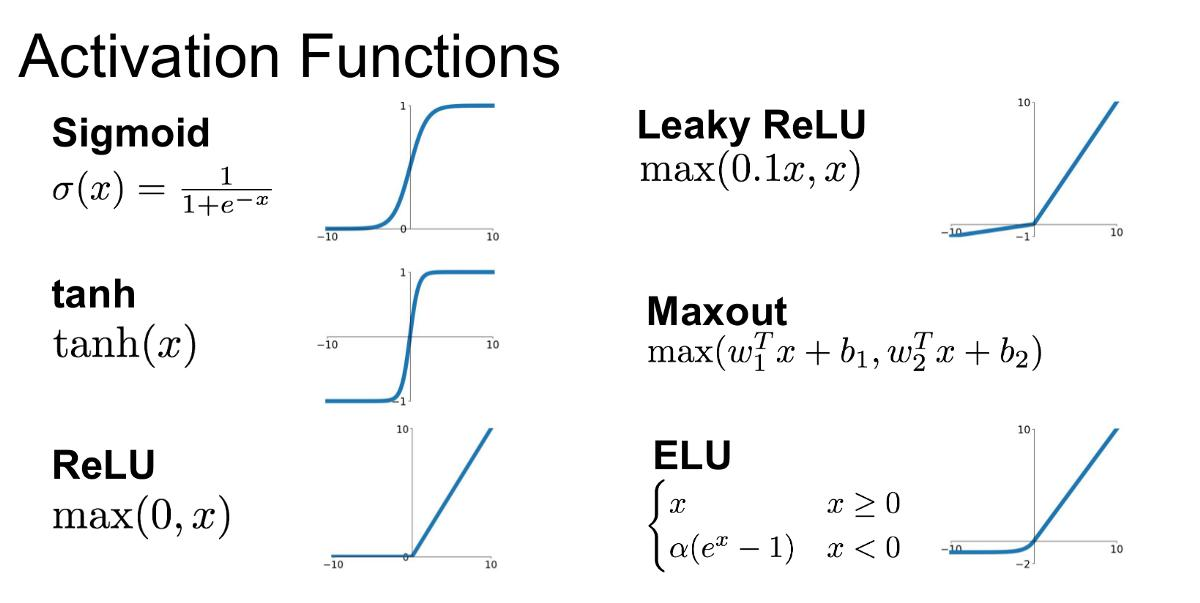

y además, se muestran las definiciones de la derivada de las funciones, tanh, sigmoide y Relu. 

Para la derivada de Tanh se tiene

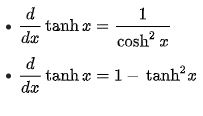 Además, para sigmoide se puede demostrar que su derivada es 
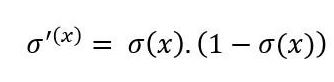 
Y finalmente se tiene la derivada de Relu como 
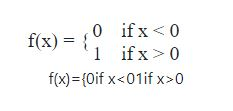

Hay que recordar que en 0 se toma su derivada como 0 como una aproximación, sin embargo matemáticamente esto es incorrecto


Esto exactamente es lo que se usa en el codigo para la evaluación de las derivadas


In [10]:
    # funcion que deriva la funcino de activacion
    
    def derivative(self, output, functAct):  
            if (self.functAct=="sigmoide"):
                derivada= output * (1.0 - output) # derivada de la funcion sigmoide
                return derivada
                
            elif (self.functAct=="tanh"):
                derivada= 1- output**2            # derivada de la funcion tanh
                return derivada

            elif (self.functAct=="relu"):         # derivada de la funcion relu 
                if (output<=0):
                    derivada= 0               
                    return derivada
                else: 
                    derivada=1
                    return derivada

Una vez se obtiene esto, se requiere la actualización de los pesos. Esta actualización se puede realizar mediante la obtención del error y la correción de los pesos y el bias en cada una de las capas de la neurona, como lo menciona el libro "computacional Intelligence an Introduction". Donde introducido un simple patrón de entrenamiento se puede actualizar los pesos como: 

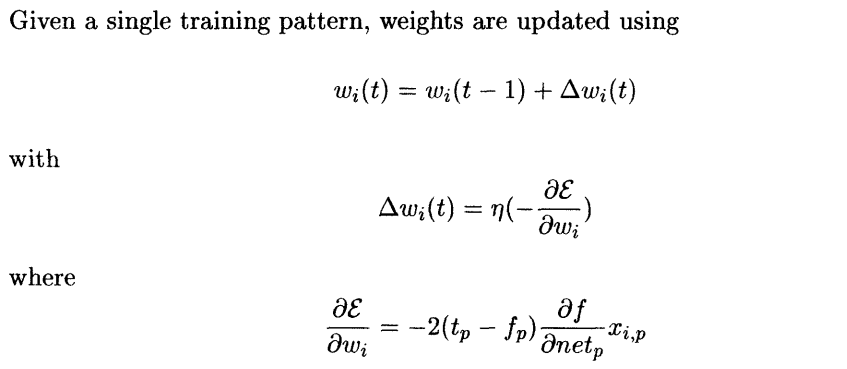

donde Wi es el peso de la entrada en estudio Wi(t-1) es el peso de la misma entrada pero en la iteración anterior, n es el learning rate y tp y fp son el dato al que se busca llegar y la salida actual respectivamente, xip es la entrada de la neurona que se está evaluando y la derivada con respecto a net es la de la función de activación que se esté utilizando. 

El algoritmo utilizado para evaluar estos pesos se muestra a continuacion 

In [11]:
    def update_weights(self, output, target, capa, l_rate, F_Act, net, tipo_capa):
    
        for i in range(0,len(capa)-1): 
            neurona = capa[i]               # obtiene la neurona de la capa 
            N_entradas=int(len(neurona)/2)  # encuentra el # de entradas de la neurona
            Entradas=[]                     # Lista con las entradas de c/neurona
            nuevos_pesos=[]                 # Lista con los nuevos pesos
            net_neu= net[i]                               # valor de net de la neurona
            for j in range(N_entradas,len(neurona)):      
                entrada = neurona[j-N_entradas]           #  entrada en estudio
                peso = neurona[j]                         # peso en estudio
                derivada2 = 0                # encuentra nuevo peso
                
                # encontrar el error 
                error = 0     
                if (tipo_capa==1):                                 # si es la capa de salida
                    derivada2 = self.derivative(output, F_Act)     # llama a la funcion derivadas 
                    error = target-output                          # encuentra el error 
                elif(tipo_capa==2):                                # si es una capa oculta
                    derivada2 = self.derivative(net_neu, F_Act)    # llama a la funcion derivada
                    error = peso*(target-output)                   # encuentra el error 
                
                nuevo_peso = peso + 2*l_rate*error*derivada2*entrada   # encuentra el nuevo peso 
        
                Entradas.append(entrada)                   
                nuevos_pesos.append(nuevo_peso)

            capa[i] = Entradas+nuevos_pesos                            # Modifica el valor del peso en la capa
        return capa

In [12]:
    def entrenamiento(self,X_train,Y_train): #se encarga del entrenamiento de la red
        limite=0
        salidaRed=0 #salida final de la red neuronal
        
        entrada=capaEntrada(5,self.functAct,self.learningRate,self.randomness) #define la capa de entrada y su número de entradas
        
        oculta=capaOculta(5,8,self.functAct,self.learningRate,self.randomness, "oculta") #define la capa oculta, el número de neuronas y su número de entradas de la misma
        oculta.inicializarCapa() 
        
        salida=capaOculta(8,1,self.functAct,self.learningRate,self.randomness, "salida") #define la capa de salida como una capa oculta con una neurona y 8 entradas
        salida.inicializarCapa()
        
        for i in range(self.epoch): #realiza el entrenamiento según número de iteraciones
            cont=0
            limite=0
            while(cont<32): #realiza las iteraciones por un batch de 32
                
                    vectorSalEntrada=[]
                    
                    vectorSalOculta=[]
                    
                    nuevaCapaSalida=[]
                    
                    nuevaCapaOculta=[]
                    
                    salidaRed=0
                    
                    entrada.actualizarEntradas(X_train[cont+limite][:]) #carga las entradas de los datos del training
                    
                    vectorSalEntrada=entrada.calcularSal() #calcula la salida de la capa de entrada
                    
                    oculta.actualizarEntradas(vectorSalEntrada) #carga la salida de la capa de entrada en la capa oculta
                    
                    oculta.calcularNet() #calcula el net de la capa oculta
                    
                    vectorSalOculta=oculta.calcularSal() #calcula la salida de la capa oculta
                    
                    salida.actualizarEntradas(vectorSalOculta) #carga la salida de la capa oculta en la capa de salida
                    
                    salidaRed=salida.calcularSal() #salida final de la red de regresión
                    
                    #Actualizar pesos de capa de salida con base en la salida
                    nuevaCapaSalida=self.update_weights(salidaRed[0], Y_train[cont+limite], salida.capa, self.learningRate,self.functAct, salida.vectorNet, 1)
                    salida.actualizarPesos(nuevaCapaSalida)
                    
                    #Actualizar pesos de capa oculta con base en la salida
                    nuevaCapaOculta=self.update_weights(salidaRed[0], Y_train[cont+limite], oculta.capa, self.learningRate,self.functAct, oculta.vectorNet,2)
                    oculta.actualizarPesos(nuevaCapaOculta)
                    cont=cont+1
            limite=limite+32

En el código principal se procesan los datos, se tienen 2 links, en cada uno se subieron los datos crudos para ser procesados con métodos de pandas, además se realiza el split de los datos con sklearn. Finalmente el codigo completo y sus pruebas: 

In [22]:
from numpy import argmax
import random
import math 
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#DEFINICION DE OBJETOS PARA LA RED NEURONAL
class capaEntrada:
    
    def __init__(self, numEntradas, functAct, tazaAprendizaje, aletoriedad):
        self.numEntradas=numEntradas
        self.vectorIn=[]
        self.functAct=functAct
        self.vectorSal=[]

    def actualizarEntradas(self,entradas):
        self.vectorIn=entradas
            
    def calcularSal(self):
        salida=0
        net=0
        self.vectorSal=[]
        if (self.functAct=="sigmoide"):
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                salida=1.0/(1.0 + np.exp(-net))
                self.vectorSal.append(salida)
                
        elif (self.functAct=="tanh"):
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                salida=np.tanh(net)
                self.vectorSal.append(salida)
           
        elif (self.functAct=="relu"):
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                salida=1.0 - net**2
                self.vectorSal.append(salida)
        else:
            for k in range(self.numEntradas):
                net=self.vectorIn[k]
                self.vectorSal.append(net)
        return self.vectorSal

class capaOculta:
    
    def __init__(self, numEntradas, numNeur, functAct, tazaAprendizaje, aleatoriedad, tipo_capa):
        self.numNeur=numNeur
        self.numEntradas=numEntradas
        self.functAct=functAct
        self.vectorSal=[]
        self.vectorNet=[]
        self.capa=[]
        self.vectorPes=[]
        for i in range(self.numNeur):
            vectorCaracol=[]
            vectorCaracol=[random.uniform(-1,1) for _ in range(self.numEntradas+1)]
            self.vectorPes.append(vectorCaracol)
        
        self.bias=1
        self.tipo_capa = tipo_capa
    
    def inicializarCapa(self):
        entradas=[1 for t in range(self.numEntradas)]
        entradas.append(self.bias)
        #Crear una matriz con la información de cada neurona
        for j in range(self.numNeur):
            vector=[]
            vector.extend(entradas)
            vector.extend(self.vectorPes[j])
            self.capa.append(vector)
    
    def actualizarEntradas(self,vectorIn):
        vectorIn.append(self.bias)
        for i in range(self.numNeur):
            self.capa[i][:(self.numEntradas+1)]=vectorIn
    
    def actualizarPesos(self,nuevaCapa):
        self.capa=nuevaCapa
            
        
    def calcularNet(self):
        self.vectorNet=[]
        for i in range(self.numNeur):
            pivote=0
            for l in range(self.numEntradas+1):
                pivote=self.capa[i][l]*self.capa[i][l+self.numEntradas+1]+ pivote
            self.vectorNet.append(pivote)

        
    def calcularSal(self):
        if (self.tipo_capa =="oculta"):
            
            salida=0
            self.vectorSal=[]
            if (self.functAct=="sigmoide"):
                for k in range(self.numNeur):
                    net=self.vectorNet[k]
                    salida=1.0/(1.0 + np.exp(-net))
                    self.vectorSal.append(salida)

            elif (self.functAct=="tanh"):
                 for k in range(self.numNeur):
                    net=self.vectorNet[k]
                    salida=np.tanh(net)
                    self.vectorSal.append(salida)

            else:
                for k in range(self.numNeur):
                    net=self.vectorNet[k]
                    salida=1.0 - net**2
                    self.vectorSal.append(salida)
            return self.vectorSal
        
        elif(self.tipo_capa == "salida"): 
            self.vectorNet=[]
            for i in range(self.numNeur):
                pivote=0
                for l in range(self.numEntradas+1):
                    pivote=self.capa[i][l]*self.capa[i][l+self.numEntradas+1]+ pivote
                self.vectorSal.append(pivote)
            return self.vectorSal


class redNeuronal:
    
    def __init__(self,functAct, learningRate, randomness,epoch):
        self.functAct=functAct
        self.learningRate=learningRate
        self.randomness=randomness
        self.epoch=epoch
        
        
    
    
    def derivative(self, output, functAct):
            if (self.functAct=="sigmoide"):
                derivada= output * (1.0 - output)
                return derivada
                
            elif (self.functAct=="tanh"):
                derivada= 1- output**2
                return derivada

            elif (self.functAct=="relu"):
                if (output<=0):
                    derivada= 0
                    return derivada
                else: 
                    derivada=1
                    return derivada
                
    
    
    def update_weights(self, output, target, capa, l_rate, F_Act, net, tipo_capa):
    
        for i in range(0,len(capa)-1): 
            neurona = capa[i]               # obtiene la neurona de la capa 
            N_entradas=int(len(neurona)/2)  # encuentra el # de entradas de la neurona
            Entradas=[]                     # Lista con las entradas de c/neurona
            nuevos_pesos=[]                 # Lista con los nuevos pesos
            net_neu= net[i]                               # valor de net de la neurona
            for j in range(N_entradas,len(neurona)):      
                entrada = neurona[j-N_entradas]           #  entrada en estudio
                peso = neurona[j]                         # peso en estudio
                derivada2 = 0                # encuentra nuevo peso
                
                # encontrar el error 
                error = 0     
                if (tipo_capa==1): 
                    derivada2 = self.derivative(output, F_Act)
                    error = target-output
                elif(tipo_capa==2): 
                    derivada2 = self.derivative(net_neu, F_Act)
                    error = peso*(target-output)
                
                nuevo_peso = peso + 2*l_rate*error*derivada2*entrada
        
                Entradas.append(entrada)
                nuevos_pesos.append(nuevo_peso)

            capa[i] = Entradas+nuevos_pesos
        return capa
    
    def entrenamiento(self,X_train,Y_train):
        limite=0
        salidaRed=0
        
        entrada=capaEntrada(5,self.functAct,self.learningRate,self.randomness)
        
        oculta=capaOculta(5,8,self.functAct,self.learningRate,self.randomness, "oculta")
        oculta.inicializarCapa()
        
        salida=capaOculta(8,1,self.functAct,self.learningRate,self.randomness, "salida")
        salida.inicializarCapa()
        
        for i in range(self.epoch):
            cont=0
            limite=0
            while(cont<32):
                
                    vectorSalEntrada=[]
                    
                    vectorSalOculta=[]
                    
                    nuevaCapaSalida=[]
                    
                    nuevaCapaOculta=[]
                    
                    salidaRed=0
                    
                    entrada.actualizarEntradas(X_train[cont+limite][:])
                    
                    vectorSalEntrada=entrada.calcularSal()
                    
                    oculta.actualizarEntradas(vectorSalEntrada)
                    
                    oculta.calcularNet()
                    
                    vectorSalOculta=oculta.calcularSal()
                    
                    salida.actualizarEntradas(vectorSalOculta)
                    
                    salidaRed=salida.calcularSal()
                    
                    #Actualizar pesos de capa de salida
                    nuevaCapaSalida=self.update_weights(salidaRed[0], Y_train[cont+limite], salida.capa, self.learningRate,self.functAct, salida.vectorNet, 1)
                    salida.actualizarPesos(nuevaCapaSalida)
                    if (cont<10 and i==1):
                        print("Actualización de peso " + str(cont) +" :" )
                        print(oculta.vectorPes[0][0])
                    
                    #Actualizar pesos de capa oculta
                    nuevaCapaOculta=self.update_weights(salidaRed[0], Y_train[cont+limite], oculta.capa, self.learningRate,self.functAct, oculta.vectorNet,2)
                    oculta.actualizarPesos(nuevaCapaOculta)
                    cont=cont+1
            limite=limite+32

        vectorSalEntrada=[]
                    
        vectorSalOculta=[]
                    
        nuevaCapaSalida=[]
                    
        nuevaCapaOculta=[]
                    
        salidaRed=0
                    
        entrada.actualizarEntradas([800,0,0.3048,71.3,0.00266337])
                    
        vectorSalEntrada=entrada.calcularSal()
                    
        oculta.actualizarEntradas(vectorSalEntrada)
                    
        oculta.calcularNet()
                    
        vectorSalOculta=oculta.calcularSal()
                    
        salida.actualizarEntradas(vectorSalOculta)
                    
        salida.calcularNet()
                    
        salidaRed=salida.calcularSal()
        
        print("Resultado de un dato de entrenamiento: ")

        print(salidaRed[0])
        
#PROCESAMIENTO DE DATOS

#Primer set de datos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/airfoil_self_noise.csv"

#Segundo set de datos
#path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/o-ring-erosion-or-blowby.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]

# asegurarse que los datos sean flotantes
X = X.astype('float32')

y=y.astype('float32')

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)    

red1=redNeuronal("sigmoide",0.01,1,1000)
red1.entrenamiento(X_train,y_train)



C:\Users\moise\Anaconda3\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: overflow encountered in double_scalars
C:\Users\moise\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\moise\Anaconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: overflow encountered in double_scalars


Actualización de peso 0 :
0.20310522497772254
Actualización de peso 1 :
0.20310522497772254
Actualización de peso 2 :
0.20310522497772254
Actualización de peso 3 :
0.20310522497772254
Actualización de peso 4 :
0.20310522497772254
Actualización de peso 5 :
0.20310522497772254
Actualización de peso 6 :
0.20310522497772254
Actualización de peso 7 :
0.20310522497772254
Actualización de peso 8 :
0.20310522497772254
Actualización de peso 9 :
0.20310522497772254
Resultado de un dato de entrenamiento: 
-0.17425046785468268


## Conclusión
No se obtuvieron los resultados esperados, sin embargo, la estructura general de la red funciona a la perfección. El problema se identificó en el "update_weights" y por consecuencia no se logró una buena optimización.